In [5]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import font_manager

import numpy as np
import pandas as pd

In [2]:
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Rajdhani/Rajdhani-Medium.ttf')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Kdam_Thmor_Pro/KdamThmorPro-Regular.ttf')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Blinker/Blinker-Regular.ttf')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Canonatia.ttf')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/Athletic.TTF')
font_manager.fontManager.addfont('/Users/arpadambrusz/Desktop/jupyter_work/fonts/franchise_2/Franchise.ttf')

In [3]:
plt.rcParams['font.family'] = 'Rajdhani'
plt.rcParams['font.size'] = 11.0
plt.rcParams['ytick.labelsize']  = 12.5
plt.rcParams['ytick.minor.left'] = False

we will work with the df created with the previous function - you can find it here -> https://github.com/ambrusza/collecting-rankings-for-teams-per-round-in-python-/tree/main/a%20simpler%20method

In [18]:
def posTeam(team,round_):
    return df[(df.team == team) & (df['round'] == round_) ]

In [16]:
def teamPerRound(team, lastRound):
    
    pos = []
    
    for num in range(1, lastRound+1):
        posI = posTeam(team,num).position.values[0]
        pos.append(posI)
    
    
    return pd.DataFrame({'team':[f'{team}' for x in range(lastRound)], 'round':[x for x in range(1,lastRound+1)],'position':pos})

In [11]:
df = pd.read_excel('/Users/arpadambrusz/Desktop/lastRound.xlsx', index_col=[0])

In [13]:
df.head()

,team,round,win,draw,lost,goalfor,goalagainst,goaldiff,point,position
0,GYIRMÓT FC GYŐR,1,1,0,0,4,0,4,3,1
1,FC AJKA,1,1,0,0,3,0,3,3,2
2,SOROKSÁR SC,1,1,0,0,3,1,2,3,3
3,KOLORCITY KAZINCBARCIKA SC,1,1,0,0,2,0,2,3,4
4,MTK BUDAPEST,1,1,0,0,2,1,1,3,5


we write a function to extract the data we are interested in

             -  team positions per round
             - different metrics - max Position, min Position, standard Deviation, maxPos and minPos difference

In [23]:
def dataSorting(dataFrame, roundNumber):
    teamsPosPerRound = {}
    teamsNumbersAnalys = {}
    
    # position of teams per round
    for pT in range(len(dataFrame.team.unique())):
        tem = dataFrame.team.unique()[pT]
        teamsPosPerRound[tem] = teamPerRound(tem,roundNumber).position.values
        
    # interesting metrics of teams
    for sT in teamsPosPerRound:
        teamsNumbersAnalys[sT] =[teamsPosPerRound[sT].max(), teamsPosPerRound[sT].min(), \
                    teamsPosPerRound[sT].max()-teamsPosPerRound[sT].min(), teamsPosPerRound[sT].std(), teamsPosPerRound[sT][-1]]
    
    return teamsPosPerRound, teamsNumbersAnalys

 assign the result to variables

In [26]:
teamPos, teamMetr = dataSorting(df,18)[0], dataSorting(df,18)[1]

 make a dataFrame - this will be good for further investigations

In [27]:
df_ana = pd.DataFrame({'team':teamPos.keys(),'currPos':[x[-1] for x in teamMetr.values()],'bestPos':[x[1] for x in teamMetr.values()], 'worstPos':[x[0] for x in teamMetr.values()],\
                       'swingPos': [x[2] for x in teamMetr.values()],'stdPos':[round(x[3],2) for x in teamMetr.values()]}).sort_values(by='currPos').reset_index(drop=True)

In [28]:
df_ana

,team,currPos,bestPos,worstPos,swingPos,stdPos
0,DVTK,1,1,18,17,5.38
1,PMFC,2,1,8,7,1.73
2,SZEGED-CSANÁD GROSICS AKADÉMIA,3,3,16,13,3.44
3,MTK BUDAPEST,4,1,5,4,1.56
4,GYIRMÓT FC GYŐR,5,1,5,4,1.25
5,AQVITAL FC CSÁKVÁR,6,5,16,11,3.47
6,SOROKSÁR SC,7,2,10,8,2.31
7,SZOMBATHELYI HALADÁS,8,4,16,12,3.16
8,FC AJKA,9,2,14,12,3.12
9,CREDOBUS MOSONMAGYARÓVÁR,10,10,19,9,2.76


we complete the dataframe because we want to adjust the line widths and alpha to the team's current position, plus the number of round where the coach be fired

In [30]:
df_ana['alpha'] = [x/20 for x in range(20,0,-1)]
df_ana['lw'] = np.linspace(14,1,20)
df_ana['fire'] = [5,0,0,13,0,0,0,7,14,8,0,0,14,3,5,0,0,0,6,9]

In [32]:
team_color = {'BUDAFOKI MTE': {'low': '#eb2729', 'high': '#0e0c0c'},
 'GYIRMÓT FC GYŐR': {'low': '#107cc6', 'high': '#f9d925'},
 'MTK BUDAPEST': {'low': '#3aace4', 'high': '#e4edf3'},
 'BFC SIÓFOK': {'low': '#e9c728', 'high': '#3a69a4'},
 'BÉKÉSCSABA 1912 ELŐRE': {'low': '#6b3a77', 'high': '#faf8f8'},
 'TISZAKÉCSKEI LC': {'low': '#1238aa', 'high': '#f1d124'},
 'DVTK': {'low': '#c91701', 'high': '#fcfbf7'},
 'DOROGI FC': {'low': '#f01e0e', 'high': '#0c0b0b'},
 'ETO FC GYŐR': {'low': '#29765e', 'high': '#f3f4f1'},
 'FC AJKA': {'low': '#086807', 'high': '#aacbaa'},
 'AQVITAL FC CSÁKVÁR': {'low': '#d89f41', 'high': '#28427c'},
 'KOLORCITY KAZINCBARCIKA SC': {'low': '#d1d3d4', 'high': '#034694'},
 'HR-RENT KOZÁRMISLENY': {'low': '#376592', 'high': '#fafafa'},
 'CREDOBUS MOSONMAGYARÓVÁR': {'low': '#448fce', 'high': '#cde2ef'},
 'PMFC': {'low': '#df2528', 'high': '#090909'},
 'NYÍREGYHÁZA SPARTACUS FC': {'low': '#e70b10', 'high': '#315183'},
 'SZOMBATHELYI HALADÁS': {'low': '#146840', 'high': '#f3f3ee'},
 'SOROKSÁR SC': {'low': '#ede411', 'high': '#0d0d0b'},
 'SZEGED-CSANÁD GROSICS AKADÉMIA': {'low': '#496282', 'high': '#0a0a0b'},
 'SZENTLŐRINC': {'low': '#c50503', 'high': '#0a0a0b'}}

In [48]:
def plot(dictionary, dataFrame, teamWhereFiredCoach, lastRoundNumber, J=''):    
    
    fig,ax = plt.subplots(figsize=(17,9.5))
    
    #we make some aesthetic adjustments that we like
    backboard = '#fefdff'

    fig.set_facecolor(backboard)
    ax.patch.set_facecolor(backboard)

    #we define and fix the fonts - if you want to change something, just rewrite it here
    main_font = 'Kdam Thmor Pro'
    signature = 'Canonatia'
    number = 'Franchise'
    col_font = 'Athletic'

    ax.grid(ls='-.',lw=0.1,color='gray',zorder=0, alpha=0.5,which='both')

    orient = ['top','right','left','bottom']
    for m in orient:
            ax.spines[m].set_visible(False)


    # through the data -  pay attention to when the coaches are fired ('if' condition)
    for m in dictionary:

            plt.plot([x for x in range(1,19)], dictionary[m],lw = dataFrame[dataFrame.team == m].lw.values[0], \
                     alpha=dataFrame[dataFrame.team == m].alpha.values[0],color=team_color[m]['low'],zorder=(dataFrame[dataFrame.team == m].currPos.values[0]-20)*-1)
            
            if dataFrame[dataFrame.team == m].fire.values[0] !=0:
                plt.scatter(dataFrame[dataFrame.team == m].fire.values[0],dictionary[m][dataFrame[dataFrame.team == m].fire.values[0]-1], c='k', marker='D',s=100,zorder=20, edgecolors='r' )

    # low-cost solution - due to 'legend'
    plt.scatter(dataFrame[dataFrame.team == teamWhereFiredCoach].fire.values[0],dictionary[teamWhereFiredCoach][dataFrame[dataFrame.team == teamWhereFiredCoach].fire.values[0]-1],\
                c='k', marker='D',s=100,zorder=20, edgecolors='r', label='coach fired' )

    # define the 'lims' and the intervals/values - 20 teams on 'y' axis, and 18 rounds on 'x' axis 
    plt.ylim([21,0])
    plt.xlim([0.6,lastRoundNumber])
    plt.yticks(np.arange(1,21), [f'{x}. ' for x in range(1,21)],color='gray')
    plt.xticks(np.arange(1,lastRoundNumber+1), [f'{x}. round' for x in range(1,lastRoundNumber+1)], rotation=90,color='gray');

    # highlights the midweek matches - at such times, the program is busy, the team leaders are also more nervous, and therefore everyone
    ax.axvspan(3, 5, facecolor='#e8e8e5',zorder=0)
    ax.axvspan(9, 11, facecolor='#e8e8e5',zorder=0)
    ax.axvspan(15, 17, facecolor='#e8e8e5',zorder=0)

    # set the right 'y' axis - we want to see the names of the teams there
    ax2 = ax.twinx()
    orient = ['top','right','left','bottom']
    for m in orient:
            ax2.spines[m].set_visible(False)

    plt.ylim([21,0])
    # set the right 'y' axis values - 20 teams on 'y' axis     
    plt.yticks(np.arange(1,21), df[df['round'] ==lastRoundNumber].team.values)

    # set labels
    ax.set_xlabel('Round', fontfamily=main_font, size=15, alpha=0.6)
    ax.set_ylabel('Position', fontfamily = main_font, size=15,alpha=0.6)

    # The signature bar, title etc.
    ax.text(15,-0.025,"Data provided by mlsz.adatbank - ambrusz" , fontfamily=signature, fontstyle = 'italic',size= 40)

    ax.text(x = 0.7, y = -0.4,
                   s = 'Position swing   after 18. rounds',
                  fontsize = 25, alpha = .55, fontfamily=number);

    ax.text(x = 0.2, y = 24.5,
        s = '*linewidth and alpha adjusted to the current position, **gray zone - midweek round                                                                                                                        \
                Hungary Merkantil Bank Liga NB2.',fontsize = 14, color = '#817f79', backgroundcolor = '#f0edec', fontfamily=main_font)

    ax.legend(frameon=True, bbox_to_anchor =(0.55, 1), ncol = 1)

    plt.tight_layout();
    
    if J:
        plt.savefig(f'/Users/arpadambrusz/Desktop/swingNb2_{lastRoundNumber}.forduló.png', dpi=300, bbox_inches="tight");

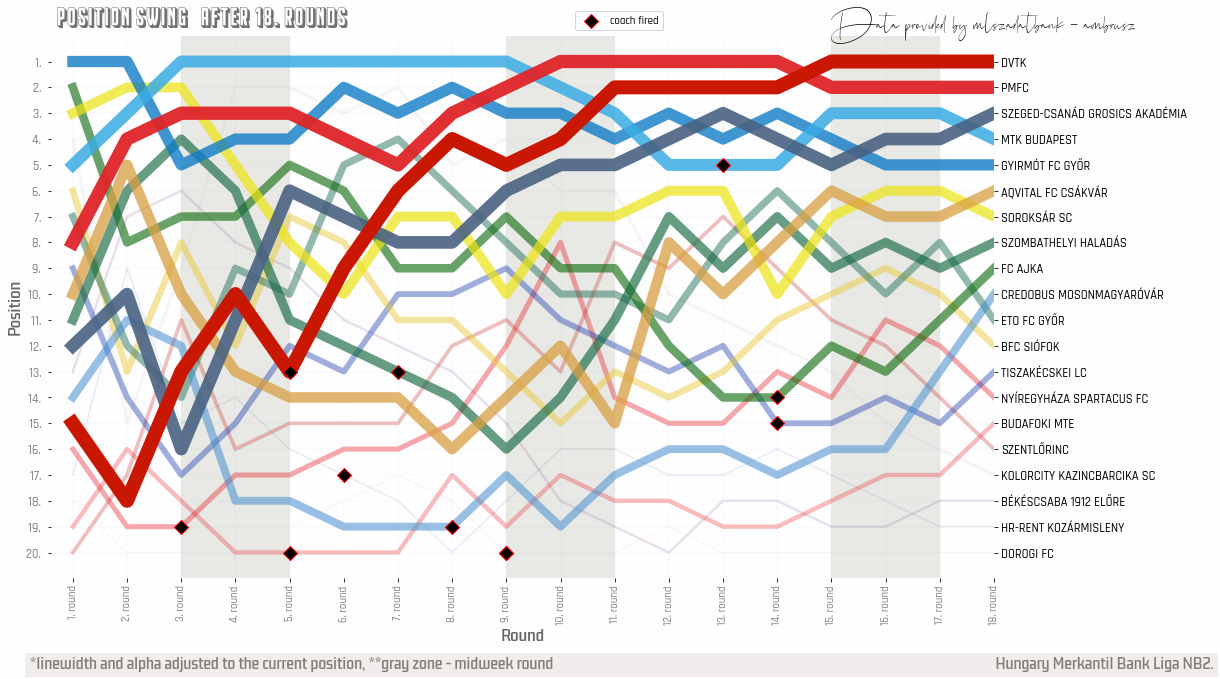

In [47]:
plot(teamPos,df_ana,'DOROGI FC',18)